In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
# 資料擴增的特徵萃取
from keras import models
from keras import layers
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W0913 12:57:27.750735 17460 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0913 12:57:27.764697 17460 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0913 12:57:27.766726 17460 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0913 12:57:27.793653 17460 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0913 12:57:28.062824 17460 deprecation_wrapper.py:119] From C:\Users\user\Anaconda

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 把 block5_conv1 之前的層都設定為不可訓練(凍結)
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# 資料路徑
DATASET_PATH  = r'C:\Users\user\程式碼_明昌瑕疵檢測\影像辨識\Machan Dataset'

# 影像大小
IMAGE_SIZE = (150,150)

# 影像類別數
NUM_CLASSES = 2

# 若 GPU 記憶體不足，可調降 batch size 或凍結更多層網路
BATCH_SIZE = 10


# Epoch 數
NUM_EPOCHS = 10

# 模型輸出儲存的檔案
WEIGHTS_FINAL = 'model-VGG16-final.h5'




# 擴充訓練資料
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        DATASET_PATH + '/train',
        # All images will be resized to 150x150
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        DATASET_PATH + '/validation',
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples // BATCH_SIZE,
      epochs=NUM_EPOCHS,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // BATCH_SIZE)

Found 1920 images belonging to 2 classes.


W0913 12:57:29.296185 17460 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0913 12:57:29.303164 17460 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Found 640 images belonging to 2 classes.
Epoch 1/10
192/192 [==============================] - 21s 112ms/step - loss: 0.3533 - acc: 0.8583 - val_loss: 0.2339 - val_acc: 0.9234
Epoch 2/10
192/192 [==============================] - 18s 95ms/step - loss: 0.1002 - acc: 0.9646 - val_loss: 0.0854 - val_acc: 0.9734
Epoch 3/10
192/192 [==============================] - 18s 95ms/step - loss: 0.0716 - acc: 0.9724 - val_loss: 0.0628 - val_acc: 0.9766
Epoch 4/10
192/192 [==============================] - 18s 95ms/step - loss: 0.0504 - acc: 0.9792 - val_loss: 0.0790 - val_acc: 0.9719
Epoch 5/10
192/192 [==============================] - 18s 96ms/step - loss: 0.0413 - acc: 0.9844 - val_loss: 0.0555 - val_acc: 0.9891
Epoch 6/10
192/192 [==============================] - 18s 96ms/step - loss: 0.0355 - acc: 0.9885 - val_loss: 0.0518 - val_acc: 0.9906
Epoch 7/10
192/192 [==============================] - 18s 96ms/step - loss: 0.0348 - acc: 0.9880 - val_loss: 0.0504 - val_acc: 0.9797
Epoch 8/10
192/192 [

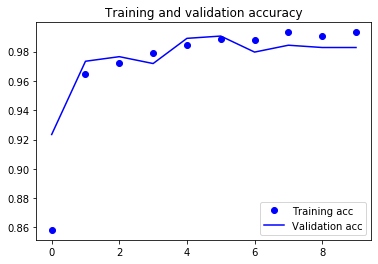

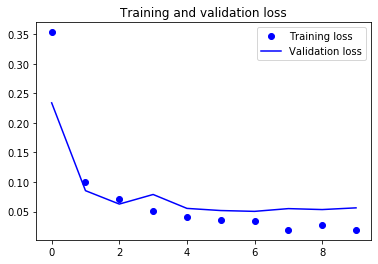

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
test_generator = test_datagen.flow_from_directory(
        DATASET_PATH + '/test',
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 640 images belonging to 2 classes.
test acc: 0.8479999923706054


In [8]:
#prediction = model.predict_classes(test_dir)